In this tutorial, you will get introduced to PyTorch, a framework for building and training neural networks. PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for backpropagation) and another module specifically for building neural networks.

More specifically, you will first learn some PyTorch basics. And then, you will train a simple neural network on **Heart Failure Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import os
import sys

DATA_PATH = "/content/drive/MyDrive/NN-lib/data/"

sys.path.append('/content/drive/MyDrive/')

In [4]:
!ls {DATA_PATH}

features_svmlight.train  features_svmlight.val


# PyTorch basics
It turns out neural network computations are just a bunch of linear algebra operations on tensors, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are **tensors** and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

With the basics covered, it is time to explore how we can use PyTorch to build a simple neural network.




In [9]:
import random
import numpy as np
import torch
import torch.nn as nn

In [5]:
# set seed
seed = 24
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

1.1 ReLU Implementation from scratch

In [6]:
#input
# x: torch.Tensor
#output
# relu(x): torch.Tensor
def relu(x):

    """
    Implement a ReLU activation function from **scratch**.

    REFERENCE: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
    """

    return torch.maximum(x, torch.tensor(0.0))  # ReLU: max(0, x)

1.2 Sigmoid Implementation from scratch

In [7]:
#input
# x: torch.Tensor
#output
# sigmoid(x): torch.Tensor
def sigmoid(x):

    """
    Implement a Sigmoid activation function from **scratch**.
    """
    return 1 / (1 + torch.exp(-x))

# Single layer network with sigmoid

Now, let us try to use the sigmoid function to calculate the output for a simple single layer network.

In [9]:
# Generate some data
# Features are 5 random normal variables
features = torch.randn((1, 5))
# weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a bias term
bias = torch.randn((1, 1))

Above I generated data we can use to get the output of our simple network. This is all just random for now, going forward we will start using normal data.

features = torch.randn((1, 5)) creates a tensor with shape (1, 5), one row and five columns, that contains values randomly distributed according to the normal distribution with a mean of zero and standard deviation of one.

weights = torch.randn_like(features) creates another tensor with the same shape as features, again containing values from a normal distribution.

bias = torch.randn((1, 1)) creates a single value from a normal distribution.

Use the generated data to calculate the output of this simple single layer network. Input features are features, weights are weights, and bias are bias. Use sigmoid as the activation function.

In [10]:
#input
# features: torch.Tensor
# weights: torch.Tensor
# bias: torch.Tensor
#output
# output of a sinlge layer network: torch.Tensor
def single_layer_network(features, weights, bias):

    """
    Calculate the output of this simple single layer network.
    """
    linear_output = torch.matmul(features, weights.T) + bias  # Compute Wx + b
    return sigmoid(linear_output)  # Apply sigmoid activation

That is how you can calculate the output for a sinlge layer. The real power of this algorithm happens when you start stacking these individual units into layers and stacks of layers, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. We will explore this in the next problem.

# NN with PyTorch
Deep learning networks tend to be massive with dozens or hundreds of layers, that is where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous problem, but in general it is very cumbersome and difficult to implement. PyTorch has a nice module nn that provides a nice way to efficiently build large neural networks.
In this problem, you will train a neural network to do exactly the same task.  We have processed the data for you. The data is saved in SVMLight format under DATA_PATH.

The SVMLight format is a sparse data representation format commonly used for machine learning tasks, particularly for support vector machines (SVMs). It stores data as a set of feature-value pairs, which is suitable for handling sparse datasets (where many feature values are zero).

In [ ]:
!ls {DATA_PATH}

#  Load the Data

In [10]:
sys.path.append('/content/drive/MyDrive/NN-lib/')

In [11]:
import utils


""" load SVMLight data """
# training data
X_train, Y_train = utils.get_data_from_svmlight(DATA_PATH + "features_svmlight.train")
# validation data
X_val, Y_val = utils.get_data_from_svmlight(DATA_PATH + "features_svmlight.val")

""" convert to torch.tensor """
X_train = torch.from_numpy(X_train.toarray()).type(torch.float)
Y_train = torch.from_numpy(Y_train).type(torch.float)
X_val = torch.from_numpy(X_val.toarray()).type(torch.float)
Y_val = torch.from_numpy(Y_val).type(torch.float)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: torch.Size([2485, 1473])
Y_train shape: torch.Size([2485])
X_val shape: torch.Size([604, 1473])
Y_val shape: torch.Size([604])


In [12]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# What's in features_svmlight.train?

This file is likely in SVMlight format, a compact format for storing labeled sparse feature vectors.

Example lines:
1 2:0.7 4:1.0 100:0.003
-1 3:0.9 55:1.0
The first number (1 or -1) is the label (Y)


The rest are feature:value pairs indicating non-zero features

Now, we will create a TensorDataset to wrap those tensors.

In [13]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)

print("Size of train_dataset:", len(train_dataset))
print("Size of val_dataset:", len(val_dataset))

#If you index train_dataset now, you will get a (data, label) tuple
print(train_dataset[0])
print([_t.shape for _t in train_dataset[0]])

Size of train_dataset: 2485
Size of val_dataset: 604
(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(0.))
[torch.Size([1473]), torch.Size([])]


Next, we will load the dataset into a dataloader so that we can use it to loop through the dataset for training and validating.

In [14]:
from torch.utils.data import DataLoader

# how many samples per batch to load
batch_size = 32

# prepare dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

print("# of train batches:", len(train_loader))
print("# of val batchse:", len(val_loader))

# of train batches: 78
# of val batchse: 19


The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch.

In [15]:
train_iter = iter(train_loader)
x, y = next(train_iter)

print('Shape of a batch x:', x.shape)
print('Shape of a batch y:', y.shape)

Shape of a batch x: torch.Size([32, 1473])
Shape of a batch y: torch.Size([32])


# Build the Model

Now, let us build a real NN model. For each patient, the NN model will take an input tensor of 1473-dim, and produce an output tensor of 1-dim (0 for normal, 1 for heart failure). The detailed model architecture is shown in the table below.
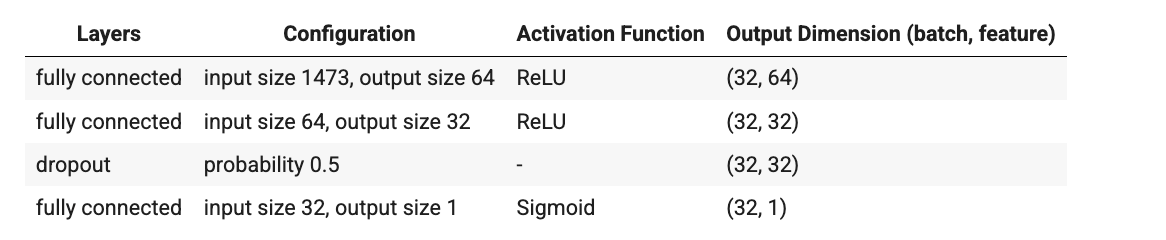


In [16]:
"""
Build the MLP shown above.
"""

class Net(nn.Module): #This defines your model class by subclassing torch.nn.Module.
    def __init__(self):
        super(Net, self).__init__() #super() ensures that the base class is initialized.

        self.fc1 = None
        self.fc2 = None
        self.dropout = None
        self.fc3 = None

        # First fully connected layer: input features = 1473, output = 64 units
        self.fc1 = nn.Linear(1473, 64)
        #Second hidden layer: 64 → 32 units
        self.fc2 = nn.Linear(64, 32)
        # Dropout regularization: randomly zeroes 50% of features during training
        self.dropout = nn.Dropout(0.5)
        # Output layer: 1 neuron for binary classification
        self.fc3 = nn.Linear(32,1)

    def forward(self, x):

        # Pass input through the layers with the activation functions
        x = torch.relu(self.fc1(x))      # Apply ReLU after the first layer
        x = torch.relu(self.fc2(x))      # Apply ReLU after the second layer
        x = self.dropout(x)              # Apply dropout
        x = torch.sigmoid(self.fc3(x))   # Apply Sigmoid to the output layer

        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=1473, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


ReLU is used for hidden layers — a common non-linear activation.

Dropout helps prevent overfitting.

Sigmoid squashes output between 0 and 1 — suitable for binary classification.

Now that we have a network, let's see what happens when we pass in an image.

In [17]:
# Grab some data
train_iter = iter(train_loader)
x, y = next(train_iter)

# Forward pass through the network
output = model.forward(x)

print('Input x shape:', x.shape)
print('Output shape: ', output.shape)

Input x shape: torch.Size([32, 1473])
Output shape:  torch.Size([32, 1])


# Train the Network
In this step, you will train the NN model.

Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. The power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

In [19]:
model = Net()

# Losses in PyTorch.

Let us start by seeing how we calculate the loss with PyTorch. Through the nn.module, PyTorch provides losses such as the binary cross-entropy loss (nn.BCELoss). You will usually see the loss assigned to criterion.

As noted in the last part, with a classification problem such as Heart Failure Prediction, we are using the Sigmoid function to predict heart failure probability. With a Sigmoid output, you want to use binary cross-entropy as the loss. To actually calculate the loss, you first define the criterion then pass in the output of your network and the correct labels.

In [18]:
# Define the loss (BCELoss), assign it to `criterion`.
"""
REFERENCE: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
"""

criterion = None
criterion = nn.BCELoss()

# Optimizer in PyTorch.

Optimizer can update the weights with the gradients. We can get these from PyTorch's optim package. For example we can use stochastic gradient descent with optim.SGD.

In [19]:
"""
Define the optimizer (SGD) with learning rate 0.01, assign it to `optimizer`.

REFERENCE: https://pytorch.org/docs/stable/optim.html
"""

optimizer = None
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Now let us train the NN model we previously created.

First, let us implement the evaluate function that will be called to evaluate the model performance when training.

Note: For prediction, probability > 0.5 is considered class 1 otherwise class 0

In [20]:
from sklearn.metrics import *

#input: Y_score,Y_pred,Y_true
#output: accuracy, auc, precision, recall, f1-score
def classification_metrics(Y_score, Y_pred, Y_true):
    acc, auc, precision, recall, f1score = accuracy_score(Y_true, Y_pred), \
                                           roc_auc_score(Y_true, Y_score), \
                                           precision_score(Y_true, Y_pred), \
                                           recall_score(Y_true, Y_pred), \
                                           f1_score(Y_true, Y_pred)
    return acc, auc, precision, recall, f1score



#input: model, loader
def evaluate(model, loader):
    model.eval()
    all_y_true = torch.LongTensor()
    all_y_pred = torch.LongTensor()
    all_y_score = torch.FloatTensor()
    for x, y in loader:
        y_hat = model(x)
        # convert shape from [batch size, 1] to [batch size]
        y_hat = y_hat.view(y_hat.shape[0])
        """
        TODO: obtain the predicted class (0, 1) by comparing y_hat against 0.5,
        assign the predicted class to y_pred.
        """
        y_pred = None
        # your code here
        y_pred = (y_hat > 0.5).long()  # If the predicted probability > 0.5, class 1, else class 0

        all_y_true = torch.cat((all_y_true, y.to('cpu').long()), dim=0) # True labels
        all_y_pred = torch.cat((all_y_pred,  y_pred.to('cpu').long()), dim=0) # Predicted classes
        all_y_score = torch.cat((all_y_score,  y_hat.to('cpu')), dim=0) # Predicted probabilities

    acc, auc, precision, recall, f1 = classification_metrics(all_y_score.detach().numpy(),
                                                             all_y_pred.detach().numpy(),
                                                             all_y_true.detach().numpy())
    print(f"acc: {acc:.3f}, auc: {auc:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1: {f1:.3f}")
    return acc, auc, precision, recall, f1

In [21]:
print("model perfomance before training:")
# initialized the model
# model = Net()
auc_train_init = evaluate(model, train_loader)[1]
auc_val_init = evaluate(model, val_loader)[1]

model perfomance before training:
acc: 0.583, auc: 0.475, precision: 0.583, recall: 1.000, f1: 0.737
acc: 0.608, auc: 0.439, precision: 0.608, recall: 1.000, f1: 0.756


# To train the model, you should follow the following step:

Clear the gradients of all optimized variables
Forward pass: compute predicted outputs by passing inputs to the model
Calculate the loss
Backward pass: compute gradient of the loss with respect to model parameters
Perform a single optimization step (parameter update)
Update average training loss

In [24]:
"""
This code trains a model for n_epochs = 100 iterations,
 using mini-batch gradient descent and tracks the training loss over time.
"""
# number of epochs to train the model
n_epochs = 100

train_loss_arr = [] #This list stores the average training loss every 20 epochs,
                        # so you can visualize or analyze training progress.
for epoch in range(n_epochs): # Epoch loop

    # prep model for training
    model.train()

    train_loss = 0
    for x, y in train_loader: # Batch loop
        """ Step 1. clear gradients """
        optimizer.zero_grad()
        """
        Step 2. perform forward pass using `model`, save the output to y_hat;
        Step 3. calculate the loss using `criterion`, save the output to loss.
        """
        y_hat = None
        loss = None
        # Step 2. perform forward pass using `model`, save the output to y_hat;
        y_hat = model(x)
        # Ensure y_hat has the same shape as y (flatten the output)
        y_hat = y_hat.view(-1)  # or y_hat.squeeze(1)

        # Step 3. calculate the loss using `criterion`, save the output to loss.
        loss = criterion(y_hat, y)

        """ Step 4. backward pass """
        loss.backward() #computes gradients of loss w.r.t. all model parameters
        """ Step 5. optimization """
        optimizer.step() # Update the weights
        """ Step 6. record loss """
        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    if epoch % 20 == 0:
        train_loss_arr.append(np.mean(train_loss))
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
        evaluate(model, val_loader)

Epoch: 0 	Training Loss: 0.687308
acc: 0.608, auc: 0.542, precision: 0.608, recall: 1.000, f1: 0.756
Epoch: 20 	Training Loss: 0.670824
acc: 0.608, auc: 0.695, precision: 0.608, recall: 1.000, f1: 0.756
Epoch: 40 	Training Loss: 0.623104
acc: 0.677, auc: 0.714, precision: 0.654, recall: 0.997, f1: 0.790
Epoch: 60 	Training Loss: 0.553853
acc: 0.728, auc: 0.733, precision: 0.721, recall: 0.902, f1: 0.801
Epoch: 80 	Training Loss: 0.506929
acc: 0.717, auc: 0.742, precision: 0.723, recall: 0.866, f1: 0.788


# What Is an Epoch?
An epoch is one full pass through the entire training dataset.

If you have 1,000 training examples, then:

1 epoch = model sees all 1,000 examples once

5 epochs = model sees all examples 5 times (through shuffling each time)

# Why More Than One Epoch?
In a single pass, the model often doesn’t learn enough.

Training for multiple epochs allows the model to gradually minimize the loss and improve accuracy.

But too many epochs can lead to overfitting — the model learns the training data too well and performs poorly on unseen data.

# What Is Batch Size?
Batch size is the number of samples the model processes **before updating its weights**.

So if:

Dataset has 1,000 samples

batch_size = 100

Then 1 epoch = 10 batches

# What Happens in Each Batch?
The model does a forward pass on 100 samples

Calculates the loss

Runs backpropagation (computes gradients)

Updates weights

This process repeats until the model has processed the full dataset (1 epoch), and then continues for the next epoch.



# Quick Analogy
Think of a full training dataset as a textbook:

Epoch: Reading the entire book

Batch: Reading a few pages at a time (before taking notes or updating your understanding)